In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from IPython.display import Image, display


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ice-cream-dataset/breyers/products.csv
/kaggle/input/ice-cream-dataset/breyers/reviews.csv
/kaggle/input/ice-cream-dataset/breyers/images/9_breyers.png
/kaggle/input/ice-cream-dataset/breyers/images/40_breyers.png
/kaggle/input/ice-cream-dataset/breyers/images/14_breyers.png
/kaggle/input/ice-cream-dataset/breyers/images/35_breyers.png
/kaggle/input/ice-cream-dataset/breyers/images/22_breyers.png
/kaggle/input/ice-cream-dataset/breyers/images/45_breyers.png
/kaggle/input/ice-cream-dataset/breyers/images/30_breyers.png
/kaggle/input/ice-cream-dataset/breyers/images/20_breyers.png
/kaggle/input/ice-cream-dataset/breyers/images/49_breyers.png
/kaggle/input/ice-cream-dataset/breyers/images/7_breyers.png
/kaggle/input/ice-cream-dataset/breyers/images/38_breyers.png
/kaggle/input/ice-cream-dataset/breyers/images/31_breyers.png
/kaggle/input/ice-cream-dataset/breyers/images/21_breyers.png
/kaggle/input/ice-cream-dataset/breyers/images/50_breyers.png
/kaggle/input/ice-cream-datas

In [2]:

print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Tensorflow version: 2.6.4
Keras version: 2.6.0


In [3]:
# Image('/kaggle/input/ice-cream-dataset/combined/images/1_breyers.png')
# cv.imshow("a",img)
# cv.waitKey(0) 
# cv.destroyAllWindows() 
from IPython.display import HTML
from base64 import b64encode

def show_image(path_to_image, width=None, height=None):

    mime_type = None
    path_to_image = path_to_image.lower()

    # More MIME types:
    # https://developer.mozilla.org/en-US/docs/Web/HTTP/Basics_of_HTTP/MIME_types
    if path_to_image.endswith('.jpg') or path_to_image.endswith('.jpeg'):
        mime_type = 'image/jpeg'
    elif path_to_image.endswith('.png'):
        mime_type = 'image/png'
    elif path_to_image.endswith('.gif'):
        mime_type = 'image/gif'
    else:
        raise ValueError('Unknown extension: %s' % (path_to_image))

    img = open(path_to_image, 'rb').read()
    data_url = 'data:image/jpeg;base64,' + b64encode(img).decode()

    width_str = "width='%d'" % (width) if width is not None else ''
    height_str = "height='%d'" % (width) if height is not None else ''

    display(HTML("<img src='%s' %s%s>" % (data_url, width_str, height_str)))


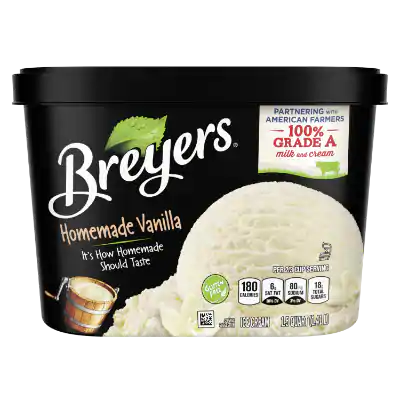

In [4]:
show_image('/kaggle/input/ice-cream-dataset/combined/images/1_breyers.png')

In [5]:
data = df = pd.read_csv("/kaggle/input/ice-cream-dataset/breyers/products.csv")
print(data)

           key                                name  \
0    0_breyers                     Natural Vanilla   
1    1_breyers                    Homemade Vanilla   
2    2_breyers                Extra Creamy Vanilla   
3    3_breyers                           Chocolate   
4    4_breyers                  Natural Strawberry   
..         ...                                 ...   
64  64_breyers                           CINNABON®   
65  65_breyers        CarbSmart™ Caramel Swirl Bar   
66  66_breyers             Layered Dessert S'mores   
67  67_breyers       Layered Dessert Peach Cobbler   
68  68_breyers  Layered Dessert Brownie Cheesecake   

                                          description  rating  rating_count  \
0   Our Original Vanilla Ice Cream. The way vanill...     4.1           467   
1   Breyers® Homemade Vanilla ice cream is thick a...     4.4            98   
2   Breyers® Extra Creamy Vanilla is our creamiest...     4.4            59   
3   Dig into a mouth-watering scoop